<div class='notice--success' markdown="1">

## <i class="fa fa-ship" aria-hidden="true"></i> Fundamentals of Raster Data in Python 

In this lesson, you will learn fundamental concepts related to working with raster data in **Python**, including understanding the spatial attributes of raster data, how to open raster data, and how to visually plot the data. 


## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this lesson, you will be able to:

* Open raster data using **Rasterio** in **Python**.
* Be able to plot raster data using **EarthPy** in **Python**.

</div>


## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> To Do Before This Lesson

Before starting this lesson, read the **What is a Raster** section of [this page](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/) of the Earth Lab website to familiarize yourself with the concept of raster data. 



## What Data Are Stored In Rasters?  

Some examples of data that often are provided in a raster format include:

- Satellite imagery
- Land use over large areas
- Elevation data
- Weather data
- Bathymetry data

In the activities below, we will primarily work with elevation data.

## Open Raster Data in Python

Since rasters are an array of data, instead of a DataFrame of data like vectors, you can't open raster data with **GeoPandas**. You can use the **rasterio** library combined with **numpy** and **matplotlib** to open, manipulate and plot raster data in **Python**.

In [1]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show

# Package created for the earth analytics program
import earthpy as et
import earthpy.plot as ep

To begin, set your working directory to `earth-analytics` and then download a 
raster file. You will start with working with some elevation data from near Boulder
that was collected around the 2013 Boulder Floods.

<i class="fa fa-star"></i> **Data Tip:**  Note that below you are using **EarthPy** 
to download a dataset from naturalearthdata.com. **EarthPy** creates the earth-analytics
directory for you when you use it. You set the working directory
after you download the data as a precaution to ensure that the earth-analytics
directory already exists on your computer. This is not a standard order of 
operations but we are demonstrating it here to ensure the notebook runs on 
all computers! 
{: .notice--success }

In [2]:
# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

Note that you imported the **rasterio** library using the shortname `rio`.

Now, you can use the `rio.open("path-to-raster-here")` function to open a raster dataset.

The raster dataset used in this example is an elevation map of an area effected by the 2013 Boulder Flood **before** the floods took place. 

In [3]:
# Define relative path to file
lidar_dem_path = os.path.join("data", "colorado-flood", "spatial",
                              "boulder-leehill-rd", "pre-flood", "lidar",
                              "pre_DTM.tif")
# Open raster data
lidar_dem = rio.open(lidar_dem_path)

To check your data, you can quickly plot the raster using the **rasterio** function called `show()`. The function argument `title = "Plot title here"` adds a title to the plot.

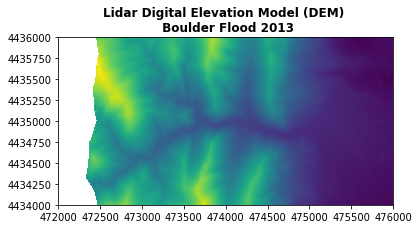

In [4]:
# Plot the dem using raster.io

show(lidar_dem,
     title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013");

### Opening and Closing File Connections

The rasterio library is efficient as it establishes a connection with the 
raster file rather than directly reading it into memory. Because it creates a 
connection, it is important that you close the connection after it is opened
AND after you've finished working with the data!


In [5]:
# Close the connection
lidar_dem.close()

```
# this returns an error as you have closed the connection to the file. 
show(lidar_dem)
```

```
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-7-dad244dfd7d3> in <module>()
      1 # this returns an error as you have closed the connection to the file.
----> 2 show(lidar_dem)

~/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/rasterio/plot.py in show(source, with_bounds, contour, contour_label_kws, ax, title, **kwargs)
     80     elif isinstance(source, RasterReader):
     81         if source.count == 1:
---> 82             arr = source.read(1, masked=True)
     83         else:
     84             try:

rasterio/_io.pyx in rasterio._io.RasterReader.read (rasterio/_io.c:10647)()

rasterio/_io.pyx in rasterio._io.RasterReader._read (rasterio/_io.c:15124)()

ValueError: can't read closed raster file

```

Once the connection is closed, you can no longer work with the data. You'll need 
to re-open the connection if you want to work with the data again. Below, the 
connection to the file is closed. 

In [6]:
lidar_dem.close()

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge:  Open a Raster Dataset

Below, we have proided a path to a similar raster dataset. The raster dataset used in this example is an elevation map of an area effected by the 2013 Boulder Flood **after** the floods took place. Like shown above, open the data, and use the `show()` function to plot the data using **rasterio**. Make sure to close the connection to your file after you have plotted the data!

Hint: Don't forget to use `rio.open()` and assign the output to a variable!
</div>


In [7]:
# Add the code here to open, show, and close the raster dataset.

lidar_dem_path_post_flood = os.path.join("data", "colorado-flood", "spatial",
                                         "boulder-leehill-rd", "post-flood", "lidar",
                                         "post_DTM.tif")


## Context Manager to Open/Close Raster Data

A better way to work with raster data in **rasterio** is to use the context manager. This will handle opening and closing the raster file for you. 

`with rio.open(path-to-file') as src:
    src.rasteriofunctionname`


In [8]:
with rio.open(lidar_dem_path) as src:
    print(src.bounds)

BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)


With a context manager, you create a connection to the file that you'd like to open. 
However, once your are outside of the `with` statement, that connection closes. Thus
you don't have to worry about opening and closing files using this syntax.

In [9]:
# Note that the src object is now closed
src

<closed DatasetReader name='data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif' mode='r'>

### Read Files with Rasterio into Numpy

Next let's explore how you read in a raster using rasterio. When you use `.read()`, rasterio imports the data from your raster into a **numpy array**. 

A **numpy array** is simply a matrix of values with no particular spatial attributes associated 
with them. **Numpy arrays** are, however, a very efficient structure for working with large and 
potentially multi-dimensional (layered) matrices.

In [10]:
with rio.open(lidar_dem_path) as src:
    # Convert / read the data into a numpy array
    # masked = True turns `nodata` values to nan
    lidar_dem_im = src.read(1, masked=True)

    # Create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)

print("object shape:", lidar_dem_im.shape)
print("object type:", type(lidar_dem_im))

object shape: (2000, 4000)
object type: <class 'numpy.ma.core.MaskedArray'>


Below you read in the data using `src.read` where
`src` is the name of the object that you defined within the context manager and
`read(1)` reads in just the first layer in your raster. Specifying the `1` is important as it will force rasterio to import the raster into a 2 dimensional vs a 3 dimensional array. 

See the example below

In [11]:
with rio.open(lidar_dem_path) as src:

    # Convert / read the data into a numpy array:
    lidar_dem_im2 = src.read(1)

with rio.open(lidar_dem_path) as src:

    # Convert / read the data into a numpy array:
    lidar_dem_im3 = src.read()

print("Array Shape Using read(1):", lidar_dem_im2.shape)

# Notice that without the (1), your numpy array has a third dimension
print("Array Shape Using read():", lidar_dem_im3.shape)

Array Shape Using read(1): (2000, 4000)
Array Shape Using read(): (1, 2000, 4000)


Also notice that you used the argument `masked=True` in your `.read()` statement. This sets all `nodata` values in your data to `nan` which you will want for plotting!

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge:  Read a Raster into a Numpy Array

Let's open the post 2013 Boulder Flood data again but this time you will use a context manager to open the data! Inside the context manager, use the `read()` function to read the numpy array to a variable that we can use later. Make sure that the data is masked, and that the data is two dimensional!


</div>


In [12]:
# Add the code here to open the raster and read the numpy array inside it

lidar_dem_path_post_flood = os.path.join("data", "colorado-flood", "spatial",
                                         "boulder-leehill-rd", "post-flood", "lidar",
                                         "post_DTM.tif")


## Plot Numpy Array

Finally, you can plot your data using `ep.plot_bands()`, a function found in the **EarthPy** package you can use to help plot data stored in **numpy arrays**.

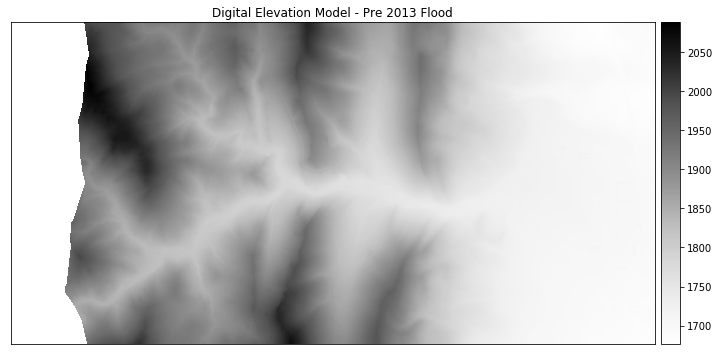

In [13]:
ep.plot_bands(lidar_dem_im,
              cmap='Greys',
              title="Digital Elevation Model - Pre 2013 Flood");

<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:** Color Ramps

When plotting raster data, you need to make use of color ramps to visually represent 
the data in a way that makes sense. While in vector plots, you can assign each 
attribute a color, there are so many discrete values in raster data that it makes sense 
to have a gradient of colors used to represent each data point. 
To plot you can select <a href="https://matplotlib.org/users/colormaps.html" target="_blank">pre-determined color ramps</a> from **matplotlib**, you can reverse a color ramp by adding `_r` at the end of the color ramps name, for example `cmap = 'viridis_r'`. </div>

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge:  Plot a Raster Dataset

Let's plot again but this time you will use the data you opened above! Using the variable you used to capture the numpy array, you can plot that numpy array using `ep.plot_bands()`. As you may have noticed in the plot above, `ep.plot_bands()` has an argument called `cmap`. You can use this to change the color ramp of the **numpy array** being plotted. In your plot, make sure to change the `cmap`, so that it doesn't use the `Greys` color ramp like the example above. Use whichever color ramp you think best represents the elevation data.  

</div>


In [14]:
# Add the code here to plot the numpy array you opened above.